In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dev_df = pd.read_csv('../data/train.csv')
del dev_df["Id"]
dev_df = dev_df.drop_duplicates().copy()
dev_df["Prediction"] = dev_df["Prediction"].apply(lambda x: 1 if x == "s" else 0)

train_df, val_df = train_test_split(dev_df, test_size=0.2, stratify=dev_df["Prediction"])
train_df, val_df = train_df.reset_index(drop=True).copy(), val_df.reset_index(drop=True).copy()

test_df = pd.read_csv('../data/test.csv')

In [3]:
train_df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,1,118.614,41.504,94.842,111.682,2.959,266.840,-1.823,1.624,4.159,...,2.489,297.104,2,115.093,-0.875,0.946,30.434,2.083,-0.988,145.527
1,1,124.663,43.502,87.071,24.499,-999.000,-999.000,-999.000,3.247,24.499,...,-1.157,134.652,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
2,1,114.277,12.118,75.049,61.524,5.204,679.019,-4.763,2.118,6.363,...,1.173,218.930,2,81.185,1.185,-3.041,30.938,-4.019,-0.759,112.122
3,0,-999.000,62.892,60.772,2.691,-999.000,-999.000,-999.000,1.807,2.691,...,-1.662,106.456,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,1,101.607,6.871,73.492,1.563,-999.000,-999.000,-999.000,3.029,1.563,...,-0.685,167.781,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000


In [4]:
train_df.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.342670,-48.548982,49.234568,81.191938,57.920640,-708.427337,-601.243934,-709.364260,2.373772,18.978275,...,-0.012896,209.922181,0.978810,-348.928380,-399.861456,-399.868373,-692.364725,-709.129484,-709.125245,73.135372
std,0.474603,405.914668,35.325668,40.721481,63.851823,454.478094,657.810823,453.015817,0.782568,22.506899,...,1.811610,126.841745,0.978108,533.165779,489.462768,489.457182,479.915426,453.380238,453.386604,98.387908
min,0.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,0.000000,78.209750,19.282000,59.422000,14.118000,-999.000000,-999.000000,-999.000000,1.812000,2.851000,...,-1.577000,122.995750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,0.000000,105.112000,46.509500,73.791000,38.476500,-999.000000,-999.000000,-999.000000,2.492000,12.467500,...,-0.026000,179.584000,1.000000,38.919000,-1.878000,-2.101000,-999.000000,-999.000000,-999.000000,40.451000
75%,1.000000,130.712000,73.600000,92.342000,79.063000,0.494000,83.543000,-4.593000,2.962000,27.628250,...,1.558000,263.402750,2.000000,75.277000,0.431000,0.496000,33.711000,-2.465000,-2.278000,109.872500
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.459000,4543.913000,16.690000,5.655000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


<AxesSubplot:>

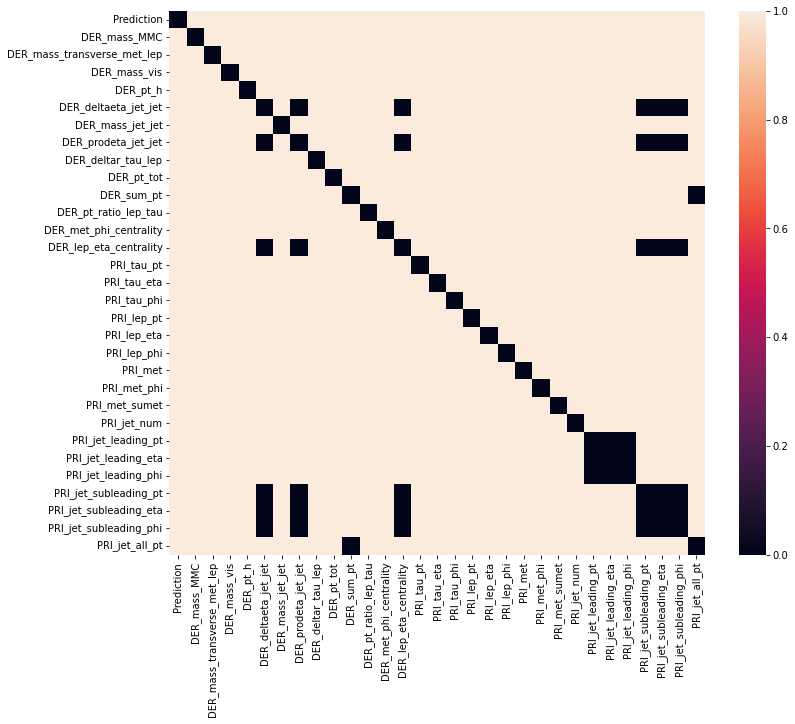

In [5]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

In [6]:
useless = [
    'DER_deltaeta_jet_jet', 
    'DER_prodeta_jet_jet',
    'DER_lep_eta_centrality', 
    'PRI_jet_subleading_eta',
    'PRI_jet_subleading_phi', 
    'PRI_jet_leading_eta', 
    'PRI_jet_leading_phi', 
    'DER_sum_pt', 
]

for col in useless:
    del train_df[col]

<AxesSubplot:>

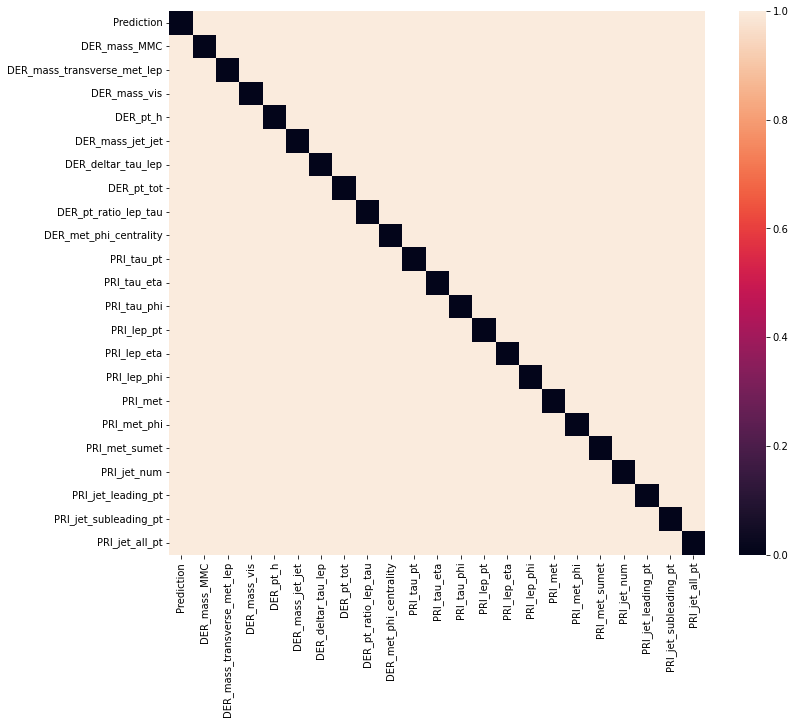

In [7]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

<AxesSubplot:>

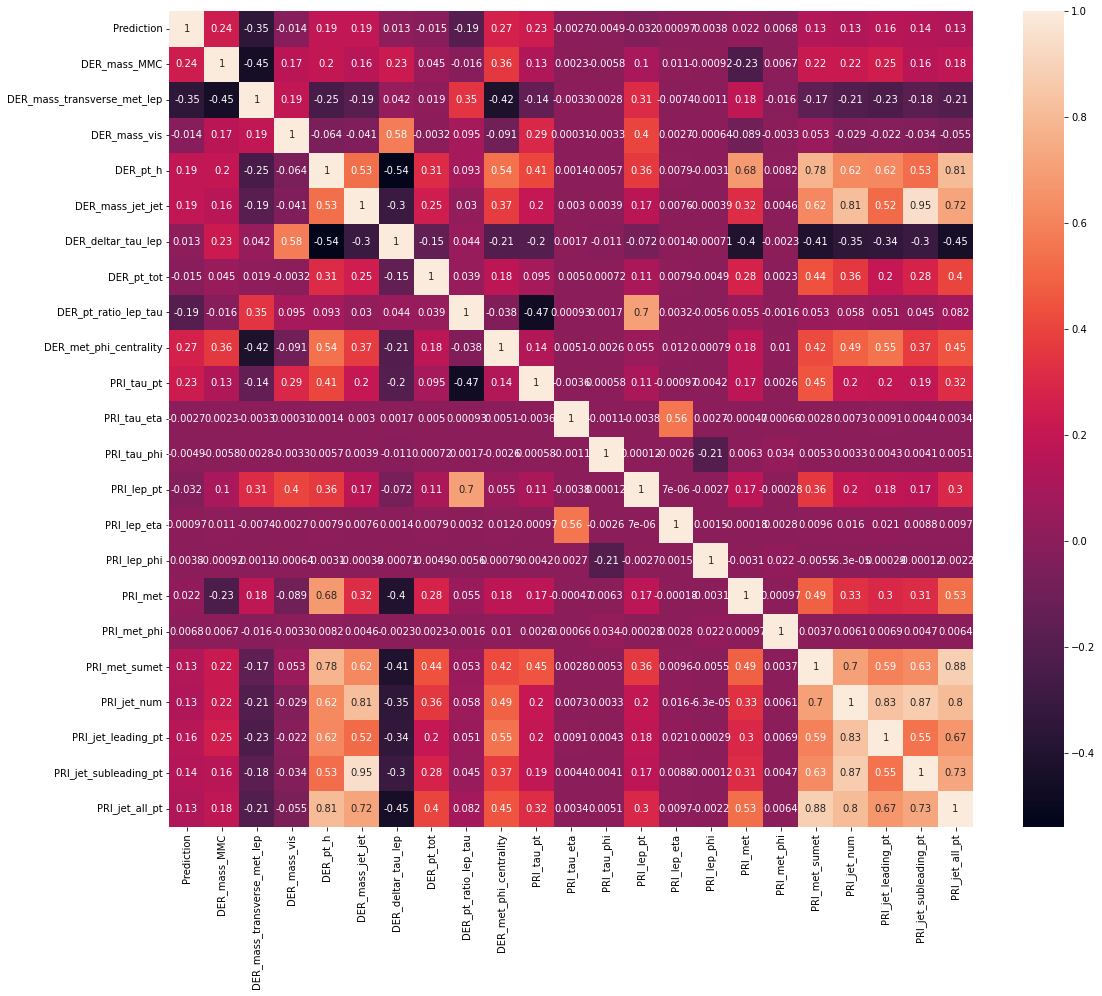

In [8]:
plt.figure(figsize=(18,15))
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)

In [9]:
import numpy as np

In [10]:
train_df[train_df < -998.000] = np.nan
train_df.fillna(train_df.mean(), inplace=True)

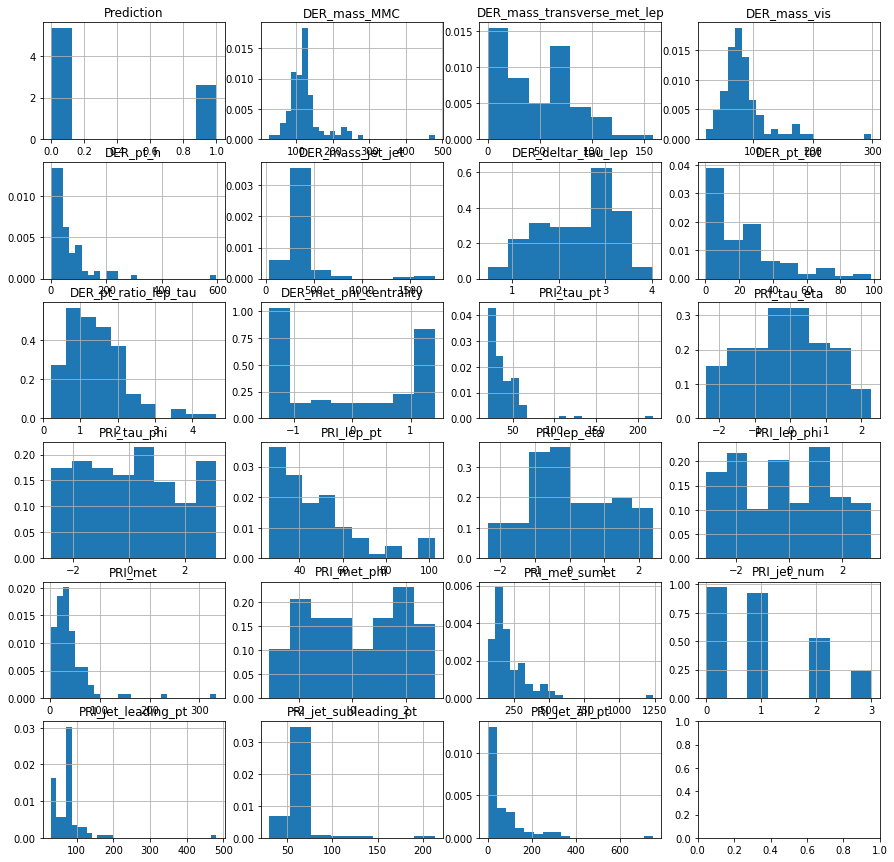

In [11]:
fig, axs = plt.subplots(6, 4, figsize=(15,15))
columns = train_df.columns
for i in range(23):
    train_df.loc[:100, columns[i]].hist(
        bins="auto", 
        density=True, 
        ax=axs[i // 4, i % 4], 
    )
    axs[i // 4, i % 4].set_title(columns[i])

donc en gros, on a enlever les truc trop corélé et après

pour vendredi, faire les code des fonctions de base, regarder pour l'overlafe et clara fait la cross validation pour avoir l'hyperparameter lambda



In [12]:
from implementations import least_squares, least_squares_GD, compute_loss, ridge_regression
from course_functions import build_poly

In [13]:
train_df

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_mass_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt
0,1,118.614000,41.504,94.842,111.682,266.840000,1.624,4.159,2.463,-0.443,...,102.425,0.279,-2.728,16.298,2.489,297.104,2,115.093000,30.434000,145.527
1,1,124.663000,43.502,87.071,24.499,371.792709,3.247,24.499,0.907,1.401,...,33.003,-1.226,1.196,16.814,-1.157,134.652,0,84.922399,57.761755,0.000
2,1,114.277000,12.118,75.049,61.524,679.019000,2.118,6.363,0.874,0.511,...,39.096,-0.350,0.858,38.129,1.173,218.930,2,81.185000,30.938000,112.122
3,0,121.894188,62.892,60.772,2.691,371.792709,1.807,2.691,0.589,-1.367,...,29.479,1.533,2.693,49.695,-1.662,106.456,0,84.922399,57.761755,0.000
4,1,101.607000,6.871,73.492,1.563,371.792709,3.029,1.563,0.762,-1.394,...,31.985,0.044,-1.081,9.558,-0.685,167.781,0,84.922399,57.761755,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,79.913000,3.668,54.427,94.862,371.792709,1.628,21.972,2.027,1.077,...,53.198,-1.874,-1.969,38.583,-1.888,271.263,1,77.839000,57.761755,77.839
199996,1,67.363000,32.179,50.567,4.620,371.792709,2.721,4.620,1.418,-1.406,...,29.991,-1.170,0.042,10.686,-2.192,172.581,0,84.922399,57.761755,0.000
199997,0,100.387000,55.206,60.906,2.246,371.792709,3.139,2.246,1.862,-1.414,...,41.518,-0.092,-0.509,18.413,2.748,64.673,0,84.922399,57.761755,0.000
199998,1,78.637000,41.193,58.498,4.899,371.792709,2.946,4.899,1.417,-1.342,...,28.735,0.504,2.175,15.423,-0.550,84.520,0,84.922399,57.761755,0.000


In [14]:
train_df = pd.concat([train_df, pd.get_dummies(train_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del train_df["PRI_jet_num"]
val_df = pd.concat([val_df, pd.get_dummies(val_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del val_df["PRI_jet_num"]
test_df = pd.concat([test_df, pd.get_dummies(test_df["PRI_jet_num"], prefix='PRI_jet_num')], axis=1).copy()
del test_df["PRI_jet_num"]

In [15]:
y_column = "Prediction"
X_columns = [col for col in train_df.columns if col != y_column]

In [16]:
X_train, y_train = train_df[X_columns].values, train_df[y_column].values
X_val, y_val = val_df[X_columns].values, val_df[y_column].values

**PCA and K-clustering**

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [18]:
sc = StandardScaler()

X_train_pca = sc.fit_transform(X_train)
X_val_pca = sc.transform(X_val)

In [19]:

pca = PCA(n_components = 2)
 
X_train_pca = pca.fit_transform(X_train_pca)
X_val_pca = pca.transform(X_val_pca)
 
explained_variance = pca.explained_variance_ratio_

In [27]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier.predict(X_val_pca)

In [29]:
cm = confusion_matrix(y_val, y_pred)

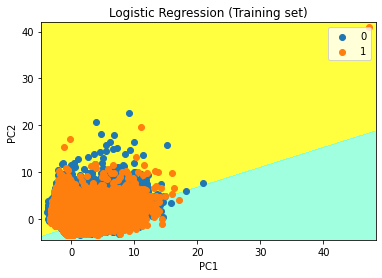

In [34]:
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


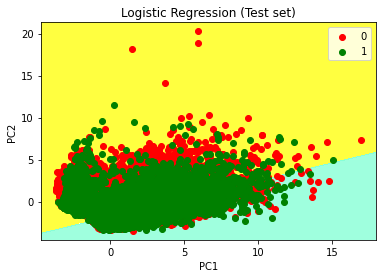

In [31]:
X_set, y_set = X_val_pca, y_val
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

***Ridge regression*** 

In [17]:
loss, w_pure = ridge_regression(y_train, X_train, lambda_=0.)
y_pred = (X_train @ w_pure).reshape(-1, 1)
y_pred = np.concatenate([1 - y_pred, y_pred], axis=1)
loss_te = compute_loss(y_val, X_val, w_pure)
print(loss, loss_te)
#plot_roc(y_val, y_pred, figsize=(8,8))

0.08509987295046989 0.09630549997169159


cross validation for the lambda params 

In [18]:
from course_functions import build_k_indices, cross_validation

In [21]:
seed = 12
degrees = 0
k_fold = 10
lambdas = np.logspace(-4, 0, 30)
k_indices = build_k_indices(y_train, k_fold, seed)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_tmp = []
    rmse_te_tmp = []
    for k in range(k_fold):
        loss_tr, loss_te,_ = cross_validation(y_train, X_train, k_indices, k, lambda_, degrees)
        rmse_tr_tmp.append(loss_tr)
        rmse_te_tmp.append(loss_te)
    rmse_tr.append(np.mean(rmse_tr_tmp))
    rmse_te.append(np.mean(rmse_te_tmp))


plt.plot(lambdas, rmse_tr, lambdas, rmse_te)
plt.legend(['training', 'test'])
plt.show()

ValueError: shapes (1,4980000) and (180000,) not aligned: 4980000 (dim 1) != 180000 (dim 0)

In [25]:
seed = 12
degrees = [0, 1, 2, 3, 4, 5, 12]
k_fold = 10
lambdas = np.logspace(-4, 0, 30)
k_indices = build_k_indices(y_train, k_fold, seed)
rmse_tr = np.empty((len(lambdas), len(degrees)))
rmse_te = np.empty((len(lambdas), len(degrees)))

for index_lambda, lambda_ in enumerate(lambdas):
    for index_degree, degree in enumerate(degrees):
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation(y_train, X_train, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr[index_lambda][index_degree](np.mean(rmse_tr_tmp))
        rmse_te[index_lambda][index_degree](np.mean(rmse_te_tmp))
    plt.plot(degrees, rmse_tr[:,index_degree], degrees, rmse_te[:,index_degree])
    #plt.legend(['training lambda ', 'test']) regarder comment afficher 
    #la legende pour avoir le lambdas et le degrées, 
    #maybe faire des petits plots
plt.show()

ValueError: shapes (1,4980000) and (180000,) not aligned: 4980000 (dim 1) != 180000 (dim 0)

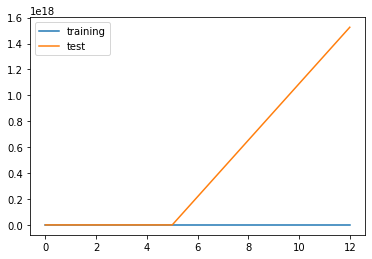

In [22]:
degrees = [0, 1, 2, 3, 4, 5, 12] #more than five = overfitting 
lambda_ = 0.5 # cross-validation à faire !!  
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train, degree)
    X_val_poly = build_poly(X_val, degree)
    loss, w_tr = ridge_regression(y_train, X_train_poly, lambda_)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()

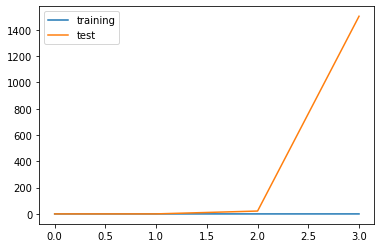

In [23]:
plt.plot(degrees[0:4], losses_tr[0:4], degrees[0:4], losses_te[0:4])
plt.legend(['training', 'test'])
plt.show()

In [22]:
losses_tr[0], losses_te[0]

(0.11425450678472221, 0.11425236236805557)

In [23]:
X_train_concatenate = np.concatenate([X_train, np.ones(X_train.shape[0]).reshape(-1, 1)], axis=1)
X_val_concatenate = np.concatenate([X_val, np.ones(X_val.shape[0]).reshape(-1, 1)], axis=1)

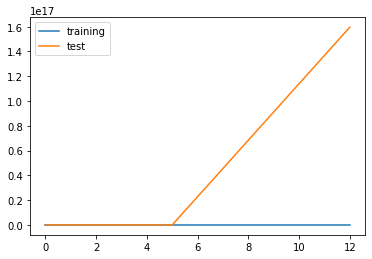

In [24]:
degrees = [0, 1, 2, 3, 4, 5, 12] #more than five = overfitting 
lambda_ = 0.1 # cross-validation à faire !!  
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train_concatenate, degree)
    X_val_poly = build_poly(X_val_concatenate, degree)
    loss, w_tr = ridge_regression(y_train, X_train_poly, lambda_)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()

In [25]:
losses_tr[0], losses_te[0]

(0.11425450678472221, 0.11425236236805557)

there is some overfitting, so we can take the 2 or the 4th degree to test the error 

**Least Squares**

In [26]:
loss_tr, W = least_squares(y_train, X_train)
loss_te = compute_loss(y_val, X_val, W)
print(loss_tr, loss_te)

0.08494267631606432 0.09143057507073467


In [27]:
loss_tr, W = least_squares(y_train, X_train_concatenate)
loss_te = compute_loss(y_val, X_val_concatenate, W)
print(loss_tr, loss_te)

0.08494267631606432 0.09143057507083333


In [28]:
degrees = [0, 1, 2, 3, 4, 5, 12] #more than five = overfitting 
lambda_ = 0.1
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train, degree)
    X_val_poly = build_poly(X_val, degree)
    loss, w_tr = least_squares(y_train, X_train_poly)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()

LinAlgError: Singular matrix

**Least Squares Gradient descente**

In [29]:
w_initial = np.zeros(np.shape(X_train)[1])  
max_iters = 50
gamma = 0.7 #il faudra faire une cross-validation ! 

L_tr, w = least_squares_GD(y_train, X_train, w_initial, max_iters, gamma)
loss_te = compute_loss(y_val, X_val, W)
print(loss_tr, loss_te)

Gradient Descent(0/49): loss=0.171335, w0=29.42172478228581, w1=7.674345133000001
Gradient Descent(1/49): loss=2231172297.900298, w0=-5360781.073093223, w1=-2052482.3062832102
Gradient Descent(2/49): loss=7.952556692929002e+19, w0=1011070139623.581, w1=388066540985.93427
Gradient Descent(3/49): loss=2.834708714586999e+30, w0=-1.908712131646943e+17, w1=-7.326685207756168e+16
Gradient Descent(4/49): loss=1.0104397326424831e+41, w0=3.6036023481523985e+22, w1=1.3832738466025129e+22
Gradient Descent(5/49): loss=3.601740301745165e+51, w0=-6.803577723700164e+27, w1=-2.611614756710839e+27
Gradient Descent(6/49): loss=1.2838502667184676e+62, w0=1.2845123544567143e+33, w1=4.9307172560468984e+32
Gradient Descent(7/49): loss=4.57631969344511e+72, w0=-2.425153708256561e+38, w1=-9.309172736405725e+37
Gradient Descent(8/49): loss=1.6312417794750787e+83, w0=4.578679652958654e+43, w1=1.7575677660464468e+43
Gradient Descent(9/49): loss=5.814606324196341e+93, w0=-8.644527281484323e+48, w1=-3.318280302739

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ML_course/projects/project1/scripts/implementations.py:7: RuntimeWarning: overflow encountered in square
  return 1/2*np.mean(e**2)


Gradient Descent(30/49): loss=inf, w0=5.404581141815771e+159, w1=2.074597553320531e+159
Gradient Descent(31/49): loss=inf, w0=-1.020382570399463e+165, w1=-3.9168311631462237e+164
Gradient Descent(32/49): loss=inf, w0=1.9264778576813288e+170, w1=7.39496021097596e+169
Gradient Descent(33/49): loss=inf, w0=-3.637181821601993e+175, w1=-1.3961652735113332e+175
Gradient Descent(34/49): loss=inf, w0=6.8669834696746895e+180, w1=2.635953967765458e+180
Gradient Descent(35/49): loss=inf, w0=-1.2964834942459887e+186, w1=-4.976669633605561e+185
Gradient Descent(36/49): loss=inf, w0=2.447755201793017e+191, w1=9.395930636469844e+190
Gradient Descent(37/49): loss=inf, w0=-4.6213511814813545e+196, w1=-1.7739476200953256e+196
Gradient Descent(38/49): loss=inf, w0=8.725090943299755e+201, w1=3.3492053960332256e+201
Gradient Descent(39/49): loss=inf, w0=-1.6472933776144906e+207, w1=-6.323285229929905e+206
Gradient Descent(40/49): loss=inf, w0=3.1100827367494533e+212, w1=1.1938335029080739e+212
Gradient Des

TypeError: list indices must be integers or slices, not tuple

In [ ]:
degrees = [0, 1, 2, 3, 4, 5] #more than five = overfitting 
max_iters = 50
gamma = 0.7 #il faudra faire une cross-validation ! 
w_initial = np.zeros(np.shape(X_train)[1])
losses_tr = []
losses_te = []

for degree in degrees: 
    X_train_poly = build_poly(X_train, degree)
    X_val_poly = build_poly(X_val, degree)
    L_tr, w = least_squares_GD(y_train, X_train_poly, w_initial, max_iters, gamma)
    losses_tr.append(loss)
    losses_te.append(compute_loss(y_val, X_val_poly, w_tr))

plt.plot(degrees, losses_tr, degrees, losses_te)
plt.legend(['training', 'test'])
plt.show()